<center>

**Aspectos Aritméticos de la Teoría de Ehrhart**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>


<center>

<div align="justify">

> **Nota de agradecimiento:**
>
> La elaboración de este material contó con la valiosa colaboración de Sophia Elia, quien proporcionó recursos de referencia y contribuciones conceptuales significativas. Su apoyo fue fundamental para el desarrollo y estructuración de los contenidos presentados. Más información sobre su trabajo puede encontrarse en [https://sophiasage.github.io/](https://sophiasage.github.io/).

</div>

# **Poliedros**

## **Aspectos básicos**

---

<div align="justify">

Primero, se define un politopo como la envolvente convexa de un conjunto de puntos; es decir, dado un conjunto $S$, se calcula $P = \mathrm{conv}(S)$:



</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P1 = Polyhedron(vertices = [[-5,2], [4,4], [3,0], [1,0], [2,-4], [-3,-1], [-5,-3]])
P1.plot()

<center>

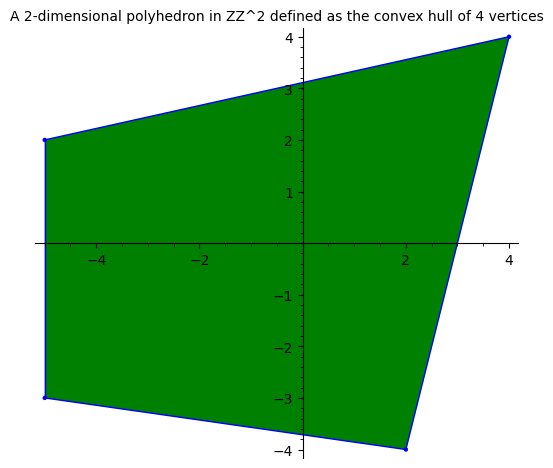

</center>

---

Incluso en solo dos dimensiones, es complicado determinar cuáles son los hiperplanos de soporte. Por suerte, Sage se encargará de eso por nosotros.


---

**👨‍💻Implementación👩‍💻**

In [ ]:

for q in P1.Hrepresentation():
   print(q)

<div align="justify">

An inequality (-4, 1) x + 12 >= 0

An inequality (1, 7) x + 26 >= 0

An inequality (1, 0) x + 5 >= 0

An inequality (2, -9) x + 28 >= 0

</div>

---

<div align="justify">


Esa notación no es inmediatamente fácil de interpretar, porque sinceramente, eso no se parece a una ecuación de recta (o de semiespacios, que es lo que realmente son).

`(-4, 1) x + 12 >= 0` en realidad significa:  
$$(-4, 1) \cdot \vec{x} + 12 \geq 0.$$

Así que... si quieres definir un politopo mediante desigualdades, debes traducir cada desigualdad a un vector.  
Por ejemplo,  
$$(-4, 1) \cdot \vec{x} + 12 \geq 0$$  
se convierte en el vector  
$$(12,\ -4,\ 1).$$


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

altP1 = Polyhedron(ieqs=[(12, -4, 1), (26, 1, 7),(5,1,0), (28, 2, -9)])
altP1.plot()

---

<div align="justify">

Otra información que podrías querer obtener de Sage sobre un politopo es la lista de vértices, lo cual se puede hacer de dos maneras:


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

for q in P1.Vrepresentation():
   print(q)

<div align="justify">

A vertex at (-5, -3)

A vertex at (-5, 2)

A vertex at (4, 4)

A vertex at (2, -4)

</div>

**👨‍💻Implementación👩‍💻**

In [ ]:

P1.vertices()

<div align="justify">

(A vertex at (-5, -3), A vertex at (-5, 2), A vertex at (4, 4), A vertex at (2, -4))

</div>

# **Duales polares**

---

<div align="justify">

De manera natural, surge el interés por calcular el dual polar de un politopo.
</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P1dual = P1.polar()
P1dual.plot()

<center>

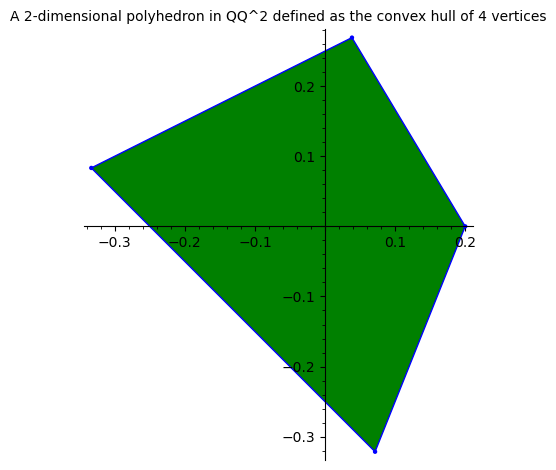

</center>

---

<div align="justify">

Cabe señalar que, a menos que el politopo esté contenido en la esfera unitaria, su dual tendrá una escala significativamente distinta. Por ello, es conveniente aplicar una reescalación.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

 ((1/4)*P1).plot() + (4*P1dual).plot()

<center>

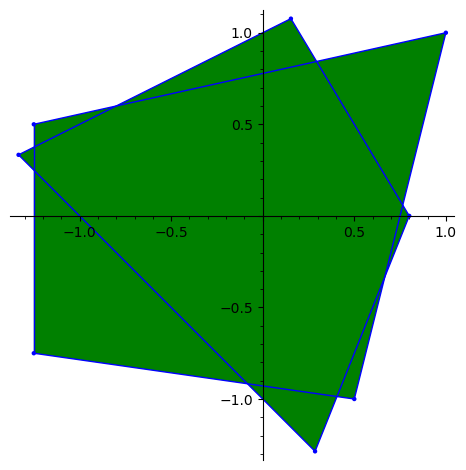

</center>

---

<div align="justify">

Si esta visualización parece algo dudosa, es porque efectivamente lo es. A continuación se presenta un ejemplo que permite aclarar mejor el problema.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P2 = Polyhedron(vertices = [[-5,0], [-1,1], [-2,0], [1,0], [-2,-1], [-3,-1], [-5,-1]])
P2
P2dual = P2.polar(); P2dual
P2.plot() + P2dual.plot()

<center>

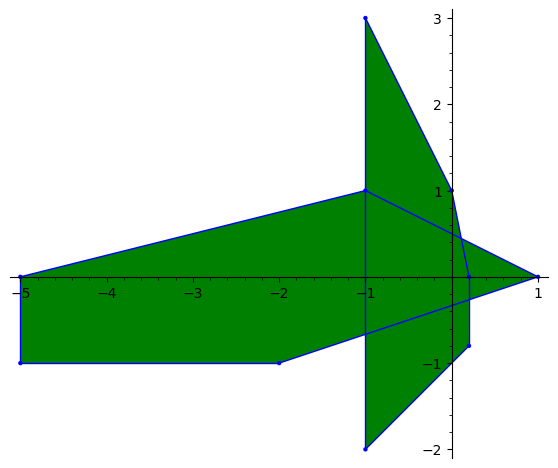

</center>

---

<div align="justify">

Está claro que eso no corresponde con lo que usualmente se entiende como el dual polar. Sin embargo, observa lo siguiente…


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P2.plot() + (-1*P2dual).plot()

<center>

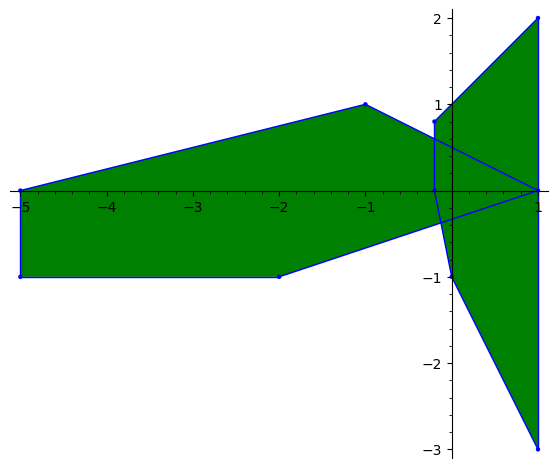

</center>

---

<div align="justify">

¿Qué está ocurriendo?

Si un politopo $P$ está en $\mathbb{Z}$, entonces:

-  El dual se invierte de alguna manera (por ejemplo, una inversión vertical en el caso de los polígonos).
-  El dual se calcula directamente sobre $P$.
- Si el origen no está contenido en $P$, se genera un error.

Sin embargo, si el politopo no está en $\mathbb{Z}$ ,por ejemplo, si está en $\mathbb{Q}$, entonces:

- El dual no se invierte.  
-  El dual se calcula sobre $P$ trasladado de forma que su baricentro esté en el origen.

Ten en cuenta todas estas consideraciones al calcular duales polares.


</div>

---

# **Construcción de Politopos**

---

<div align="justify">

Suma de Minkowski

A continuación, se presenta la operación de suma de Minkowski, la cual puede ser expresada mediante dos sintaxis distintas.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P1+P2

<center>

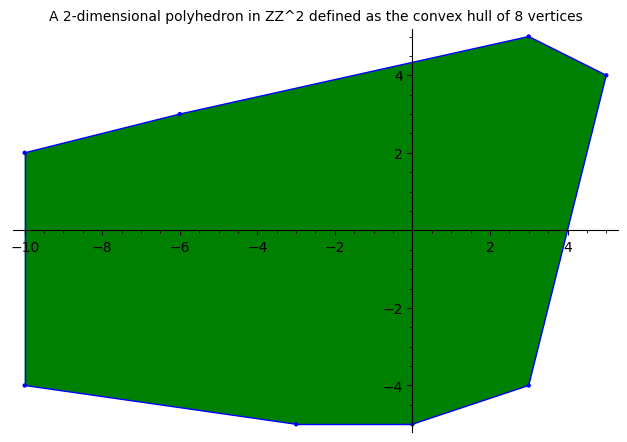

</center>

**👨‍💻Implementación👩‍💻**

In [ ]:

P1.minkowski_sum(P2)

<center>

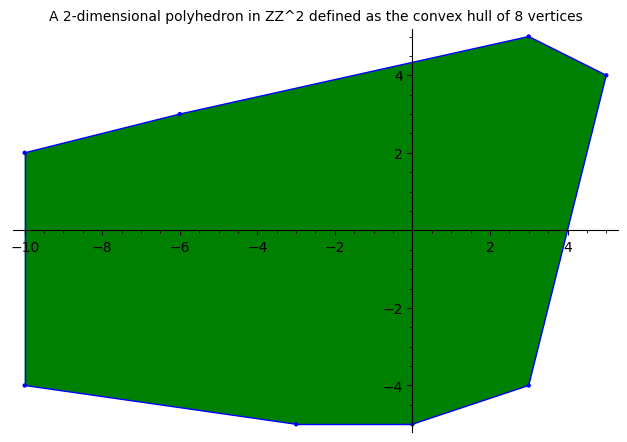

</center>

<div align="justify">

</div>

---

<div align="justify">

De acuerdo, es razonable incluir al menos algunos ejemplos en tres dimensiones.  
(Se debe tener en cuenta que, para visualizar poliedros de forma efectiva, es necesario contar con software de visualización como **Javaview** o **Jmol** instalado).


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P3 = Polyhedron(vertices=[(0,0,0), (0,0,1/2), (0,1/2,0), (1/2,0,0), (3/4,1/5,3/2)]); P3
P4 = Polyhedron(vertices=[(-1,1,0),(1,1,0),(-1,0,1), (1,0,1),(0,-1,1),(0,1,1)]); P4
P3.plot() + P4.plot()

<center>

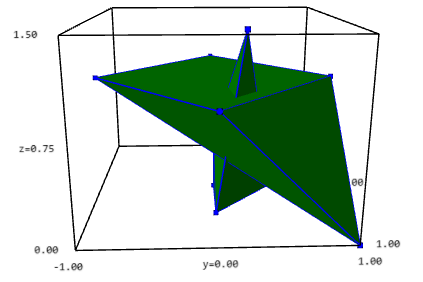


</center>

**👨‍💻Implementación👩‍💻**

In [ ]:

(P3+P4).plot()

<center>

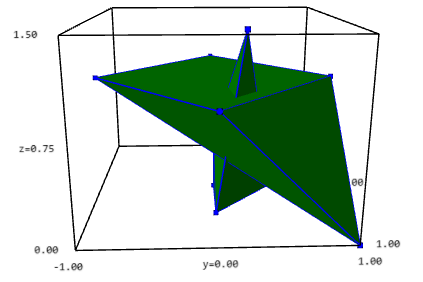


</center>

---

<div align="justify">

También puede calcularse la intersección de dos politopos, operación que, al igual que otras, admite dos formas sintácticas distintas.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

int12 = P1.intersection(P2*.5); int12.plot()

<center>

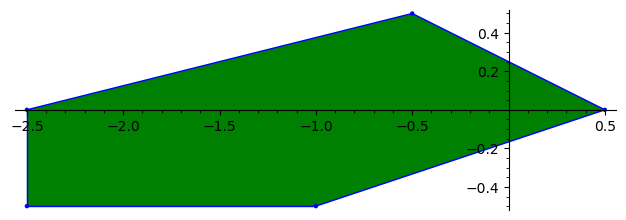

</center>

**👨‍💻Implementación👩‍💻**

In [ ]:

int34 = P3 & P4; int34.plot()

<center>

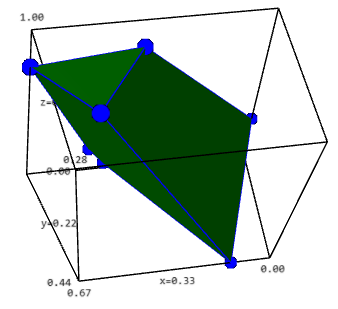

</center>

---

<div align="justify">

En caso de que se desee realizar una traslación, esta también puede llevarse a cabo.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

transP2 = P2.translation([2,1])
P2.plot() + transP2.plot()

<center>

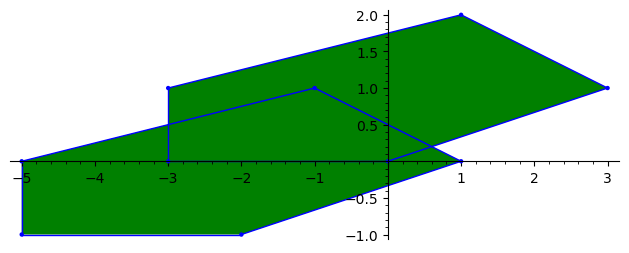

</center>

---

<div align="justify">

También pueden construirse prismas, pirámides y bipirámides a partir de politopos, lo cual amplía significativamente las posibilidades geométricas de análisis.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P2.prism().plot()

<center>

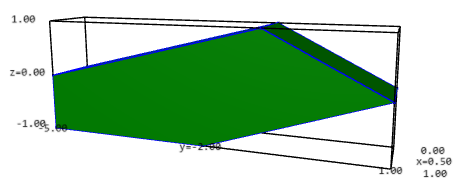

</center>

**👨‍💻Implementación👩‍💻**

In [ ]:

P1.pyramid().plot()

<center>

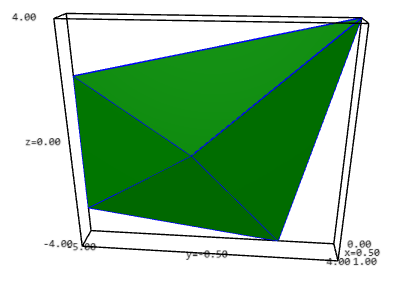

</center>

**👨‍💻Implementación👩‍💻**

In [ ]:

P2dual.bipyramid().plot()

<center>

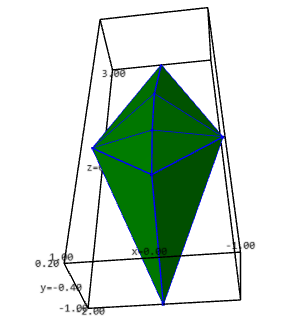

</center>

---

<div align="justify">

Está bien, es cierto: Sage incluye ciertos tipos de politopos predefinidos. Al escribir polytopes. y presionar la tecla TAB después del punto, se mostrará una lista de politopos ya construidos disponibles en el sistema.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P5 = polytopes.hypercube(5)
P6 = polytopes.cross_polytope(3)
P7 = polytopes.simplex(7)

---

<div align="justify">

Procede ahora examinarse un politopo en cuatro dimensiones.


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P8 = polytopes.hypercube(4)
P8.plot()

<center>

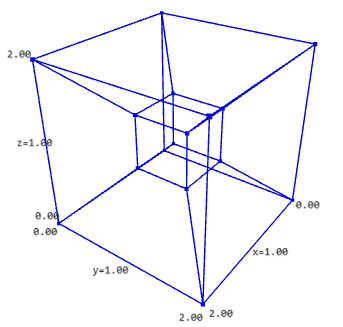

</center>

---

<div align="justify">

Puede visualizarse desde una perspectiva distinta:


</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P8.schlegel_projection(position=1/2).plot()

<center>

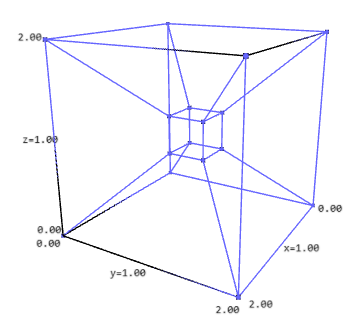

</center>

# **Consultas a politopos**

---

<div align="justify">

Una vez que se ha construido un politopo, es posible realizar consultas sobre sus propiedades.
</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

P1 = Polyhedron(vertices = [[-5,2], [4,4], [3,0], [1,0], [2,-4], [-3,-1], [-5,-3]])

**👨‍💻Implementación👩‍💻**

In [ ]:

P1.contains([1,0])

True

**👨‍💻Implementación👩‍💻**

In [ ]:

P1.interior_contains([3,0])

False

**👨‍💻Implementación👩‍💻**

In [ ]:

P3 = Polyhedron(vertices=[(0,0,0), (0,0,1/2), (0,1/2,0), (1/2,0,0), (3/4,1/5,3/2)])

**👨‍💻Implementación👩‍💻**

In [ ]:

P3.contains([1,0,0])

False

---

<div align="justify">

La información relativa a las caras del politopo puede resultar de utilidad en diversos contextos.

</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

int34.f_vector()

(1, 8, 12, 6, 1)

---

<div align="justify">

No obstante, la información geométrica podría resultar aún más útil.  
En este caso, se indica cuáles de los vértices conforman cada 2-cara.

</div>

---

**👨‍💻Implementación👩‍💻**

In [ ]:

[f.ambient_V_indices() for f in int34.faces(2)]

[(2, 6, 7), (0, 1, 3, 5), (1, 3, 4), (0, 5, 6, 7), (0, 1, 2, 4, 6), (2, 3, 4, 5, 7)]

---

<div align="justify">

Ciertamente, en su forma actual, esa información no resulta particularmente útil. Procederá entonces determinarse la representación por vértices y por hiperplanos de la primera cara en la lista.

</div>


---

**👨‍💻Implementación👩‍💻**

In [ ]:

first2faceofint34 = int34.faces(2)[0]
first2faceofint34.ambient_Hrepresentation(); first2faceofint34.vertices()


(An inequality (0, 0, -1) x + 1 >= 0,)

(A vertex at (2/3, 2/15, 1), A vertex at (3/8, 1/10, 1), A vertex at (1/2, 3/10, 1))

# **Referencias Bibliográficas**

**Referencias Bibliográficas**

- Beck, M., & Robins, S. (2015). *Computing the Continuous Discretely* (2nd ed.). Springer. Undergraduate Texts in Mathematics. https://link.springer.com/book/10.1007/978-1-4939-2969-6
